# Grundgerüst Leistungsnachweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Child Mortality rate
### 1.2 Fragestellung:
- Welche Länder hatten in den letzten 10 Jahren die grösste Zunahme der Kindersterblichkeitsrate?   
### 1.3 Datenquellen:

- https://ourworldindata.org/child-mortality-big-problem-in-brief



### 1.4 Daten beschaffen und laden

In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# lade hier deine Daten
df=pd.read_csv("child-mortality.csv", skiprows=1, names= ["Gebiete", "Code", "Jahr", "Kindersterblichkeitsrate"])
df.head()


,Gebiete,Code,Jahr,Kindersterblichkeitsrate
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


## 2. Daten vorbereiten

- Wir haben den Datensatz so filtriert, dass wir nur noch die Rohdaten der Länder heruntergeladen haben.
- Diesen Roh-Daten sind bereits im Longformat.
- Wir haben für die Analyse einen Pivot Table erstellt. Im Wide Format repräsentieren die Reihen die Gebiete und die Spalten die        Jahreszahlen. Um die Rohdaten auf spezifische Aspekte zu analysieren haben wir das Long-Format verwendet.
- Es kommen Integers (Jahreszahlen), Floats (Kindersterblichkeitsraten) und Objects (Gebiete und Codes) vor.

In [3]:
df_pivot=df.pivot(index = "Gebiete", columns= "Jahr", values= "Kindersterblichkeitsrate")
df_pivot.head()

Jahr,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiete,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.794618,9.253248,8.788085,8.397621,8.036232,7.714489,7.418636,7.151876,6.912662,6.687379


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?

- Unsere Variablen, bzw. die Kindersterberaten, sind kontinuierlich.
- Die Spalte Gebiete enthält 199 verschwiedene Gebiete.
- Die Spalte Codes enthält 198 verschiedene Codes.
- Es sind Daten zwischen 1800 und 2022 vorhanden.


- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?

 - Ab dem Jahr 1985 gibt es für jedes Gebiet vollsändige Daten. Anhand der Grafik kann man erkennen, dass ab 2011 nicht mehr für jedes Gebiet Daten vorhanden sind. Die Abnahme ist jedoch sehr klein.
 - Da ab 2011 nur bei wenigen Ländern die Datenpunkte fehlen, bleibt unsere Fragestellung bestehen, in der wir die Datenpunkte zwischen 2012 und 2022 analysieren. 

- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

- Die Kindersterblichkeitsrate streut zwischen 0.15% und 68.21%. 

- Wir haben zur Dastellung Säulendiagramme, ein Liniendiagramm und ein Histogramm verwendet.
- Um die Anzahl Datenpunkte pro Gebiet und pro Code zu veranschaulichen, haben wir jeweils ein Säuendiagramm erstellt.
- Die Anzahl Datenpunkte pro Jahr haben wir als Liniendiagramm dargestellt. Dabei haben mittels g.axvline die Stelle markiert, ab der wir für jedes Gebiet einen vollständigen Datensatz haben.

- Die wichtigsten statistischen Werte haben wir mit der Funktion df.describe veranschaulicht. Danach haben wir diese Daten als Histogramm dargestellt. Darauf sind der Median und der Mittelwert speziell markiert.


In [7]:
df.dtypes

Gebiete                      object
Code                         object
Jahr                          int64
Kindersterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete 

In [8]:
print("Anzahl verschiedener Gebiete: ", len(df["Gebiete"].unique()))

Anzahl verschiedener Gebiete:  199


In [9]:
df["Gebiete"].value_counts()

Gebiete
Sweden        223
Austria       213
France        207
Belgium       189
Denmark       188
             ... 
Kosovo         38
San Marino     38
Andorra        38
Monaco         38
Nauru          38
Name: count, Length: 199, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiete', ylabel='Anzahl Datenpunkte'>

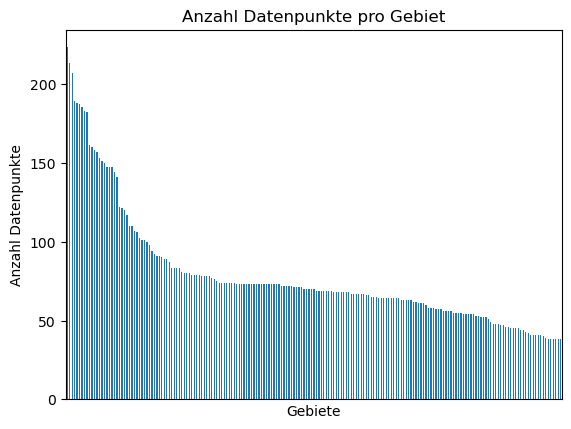

In [12]:
df["Gebiete"].value_counts().plot(kind="bar", 
                                  xticks=[],
                                  ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Gebiet")

### 3.2 Analyse Codes

In [10]:
print("Anzahl verschiedener Codes: ", len(df["Code"].unique()))

Anzahl verschiedener Codes:  198


In [11]:
df["Code"].value_counts()

Code
SWE         223
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
NRU          38
AIA          38
OWID_KOS     38
SMR          38
MCO          38
Name: count, Length: 197, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

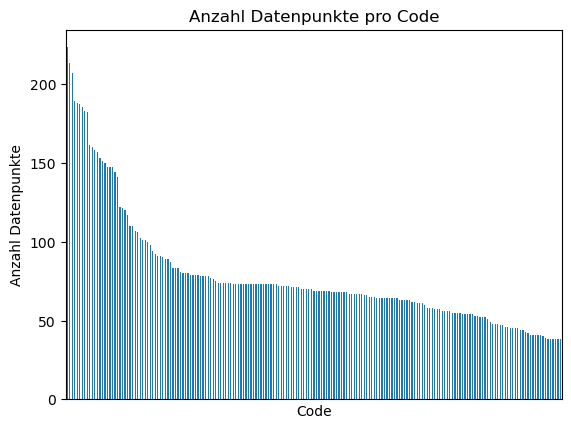

In [15]:
df["Code"].value_counts().plot(kind="bar", 
                                  xticks=[],
                                  ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Code")

### 3.3 Analyse Jahr

In [12]:
print("Anzahl verschiedener Jahre: ", len(df["Jahr"].unique()))

Anzahl verschiedener Jahre:  223


In [13]:
df["Jahr"].value_counts().sort_index()

Jahr
1800      1
1801      1
1802      1
1803      1
1804      1
       ... 
2018    198
2019    198
2020    198
2021    198
2022    198
Name: count, Length: 223, dtype: int64

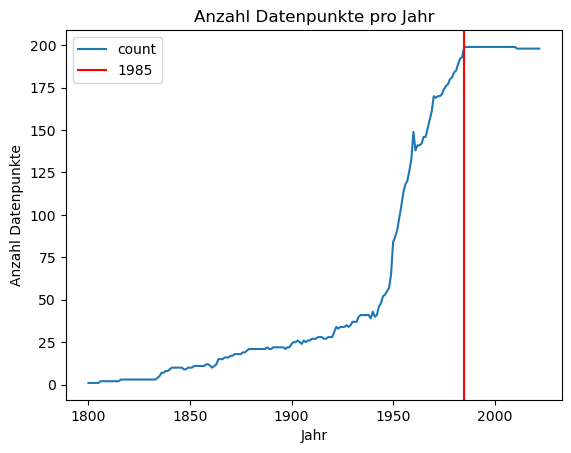

In [18]:
g=df["Jahr"].value_counts().sort_index().plot(ylabel="Anzahl Datenpunkte", title= "Anzahl Datenpunkte pro Jahr");
g.axvline(x=1985, color = 'red', label = '1985')
g.legend()


### 3.4 Analyse Kindersterblichkeit

In [14]:
df.describe()

,Jahr,Kindersterblichkeitsrate
count,15608.000000,15608.000000
mean,1974.224564,10.491636
std,39.630429,10.458375
min,1800.000000,0.146058
25%,1959.000000,2.164301
50%,1983.000000,6.501221
75%,2003.000000,16.408544
max,2022.000000,68.208000


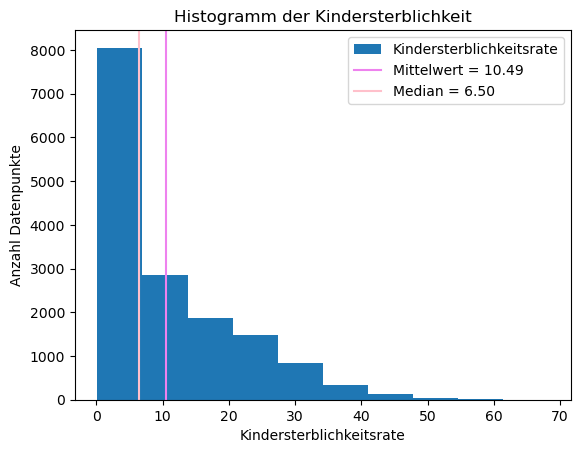

In [20]:
g = df ['Kindersterblichkeitsrate'].plot(kind='hist', bins=10, title='Histogramm der Kindersterblichkeit',
                                         xlabel='Kindersterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Kindersterblichkeitsrate'].mean()
g.axvline(x=df['Kindersterblichkeitsrate'].mean(), color = 'violet', label=f'Mittelwert = {mean:.2f}')

median = df['Kindersterblichkeitsrate'].median()
g.axvline(x=df['Kindersterblichkeitsrate'].median(), color='pink',label=f'Median = {median:.2f}')
g.legend()

# bins anpassen evtl. 

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Beobachtungen

Die Kindersterblichkeitsrate bedeutet die Wahrscheinlichkeit vom Tod in den ersten 5 Jahren von Kindern die lebend geboren wurden. Angegeben ist pro 1'000 Lebendgeburten angegeben.

Es gab insgesamt 9 Länder mit einer Zunahme der Kindersterblichkeitsrate zwischen 2012-2022:

- Fiji
- Venezuela
- Lebanon
- Palau
- Kuba
- Grenada
- Zypern
- Seychellen
- Mauritius


Die Zunahmen der Länder liegen zwischen 0.091 (Mauritius) und Fiji (0.701)

- Alle Länder bei denen die Kindersterblichkeitsrate zugenommen hat sind anfällig für wirtschaftliche Instabilitäten, auswirkungen von Krisen und Konflikten, Umweltschwankungen und sind abhängig von externen Ressourcen (Lebensmittel, Medikamente und medizinische Ausrüstung)

Die Kindersterblichkeitsrate von Fiji schwankt über die gesamten 10 Jahre am meisten, mit einem starken Anstieg ab 2016. Im Jahr 2022 hat Fiji die höchste Kindersterblichkeistrate von allen Ländern. Venezuelas Kindersterblichkeitsrate blieb über die 10 Jahre sehr konstant, zeigt jedoch einen einmaligen aber sehr starken Anstieg zwischen 2015 und 2016. Zusätzlich stieg auch im Lebanon die Kindersterblichkeitsrate ab 2016 und zeigt ab dem Jahr 2021 eine höhere Kindersterblichkeitsrate als Grenada, Zypern und die Seychellen. Lebanon zeigt, wie auch Fiji, die grösste Zunahme im Jahr 2022.

Der generelle sind die Kindersterblichkeitsraten der 9 Länder mehr oder weniger konstant zwischen 2012 und 2015. 
Ab 2015:

- Die Zunahme der Kindersterblichkeitsrate in Fiji beginnt im Jahr 2016 zu steigen und tut dies auch weiterhin über die nächsten 6 Jahre, mit der grössten Zunahme im Jahr 2022.
- In Venezuela hat die Kindersterblichkeitsrate zwischen 2015 und 2016 einen sher starken Anstieg erlebt aber von da an stabilisiert und bleibt konstant.
- Der Lebanon zeigt ab 2016 zunächst eine langsamen aber kontinuerlichen Anstieg in der Kindersterblichkeitsrate. Im Jahr 2022 sieht man die grösste Zunhame der letzten 10 Jahre im Lebanon.
- Die Kindersterblichkeitsrate der restlichen Länder bleiben mehr oder weniger konstant. 

### Interpretation

Generelle Abwärtstrend der Kindersterblichkeitsrate:
- Der Grund für die Kindersterblichkeit bei Säuglingen und Kleinkindern ist meistens eine Infektionskrankheit die Durchfall und Lungenentzündungen auslöst.
- Durch die Verbesserung des Gesundheitsystems und besserem Zugang zur Nahrung, sauberem Trinkwasser wie auch dem Ausbau der Sanitätsversorgung lässt sich erklären, dass die Kindersterblichkeitsrate im generellen konstant bleibt und auch bei einigen Ländern sogar ein wenig abnimmt.

https://www.malteser-international.org/de/themen/so-helfen-wir/gesundheit/kindersterblichkeit.html

#### Venezuela: 
- Das Gesundheitswesen in Venezuela erlitt durch die unstabile politische Situation eine Versorgungskrise die im Jahr 2015 began. Krankenhäuser erlitten extremen Materialmangel und sogar die Hygiene litt darunter. So auch das Hospital de Ninos in Caracas, welches das einzige im Land ist, dass Dialyse für Kinder mit weniger als 20 Kilo Körpergewicht anbietet. Durch die unzureichenden Hygienebedingungen erlitten viele dieser Kleinkinderninfektionen welche bis zum Tod führen kann. Dies wird im Peak den man in 2016 in der Kindersterblichkeitsrate erkennt wiedergespiegelt.

- Dadurch das die politische Situation immernoch sehr instabil ist und daher auch die Versorgungskriese bestehen bleibt ist auch die Kindersterblichkeitsrate konstant so hoch geblieben.

https://www.deutschlandfunk.de/krise-in-venezuela-gesundheitssystem-ohne-seife-und-100.html


#### Fiji:

- 2016 wurde Fidschi von einem heftigen Wirbelsturm mit dem Namen «Zyklon Winston» getroffen. Diese Umweltkatastrophe führte auf mehreren Fidschi-Inseln zu verheerenden Schäden. Viele Einwohner wurden vom Strom-, Wasser und Kommunikationsnetz abgeschnitten. Es kam zu starken Infrastrukturschäden. Die Gesellschaft und somit auch das Gesundheitssystem litt unter den Folgen dieses Zyklons, was wiederum Folgen für die Kindersterblichkeitsrate hatte.

https://de.wikipedia.org/wiki/Zyklon_Winston

https://www.spiegel.de/wissenschaft/natur/zyklon-winston-auf-fidschi-inseln-schwere-schaeden-mindestens-10-tote-a-1078600.html

#### Lebanon:


### Berechnungen

In [5]:
diffs = df_pivot[2022]-df_pivot[2012]
diffs = diffs.sort_values().dropna()

diffs

Gebiete
Sierra Leone   -4.675695
Somalia        -4.010715
Angola         -3.737656
Chad           -3.686804
Burkina Faso   -3.314599
                  ...   
Cuba            0.194723
Palau           0.265259
Lebanon         0.502895
Venezuela       0.676667
Fiji            0.701049
Length: 198, dtype: float64

<Axes: title={'center': 'Länder mit der grössten Zunahme der Kindersterblichkeitsrate 2012-2022'}, xlabel='Zunahme der Kindersterblichkeitsrate in %', ylabel='Gebiete'>

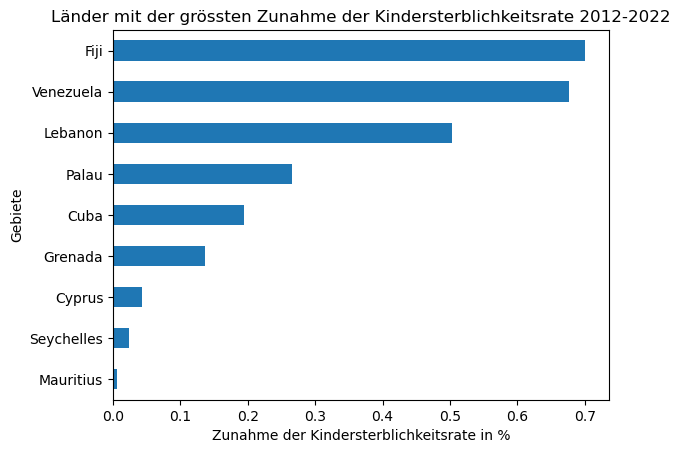

In [6]:
diff_sel = (diffs < -5) | (diffs > 0)
diffs[diff_sel].plot(kind='barh', title='Länder mit der grössten Zunahme der Kindersterblichkeitsrate 2012-2022', xlabel="Zunahme der Kindersterblichkeitsrate in %")

In [7]:
Gebiets_liste = diffs[diff_sel].index.tolist()
print(Gebiets_liste)

['Mauritius', 'Seychelles', 'Cyprus', 'Grenada', 'Cuba', 'Palau', 'Lebanon', 'Venezuela', 'Fiji']


### Visualisierung

Text(2012.5, 3.6, 'Versorgungskrise')

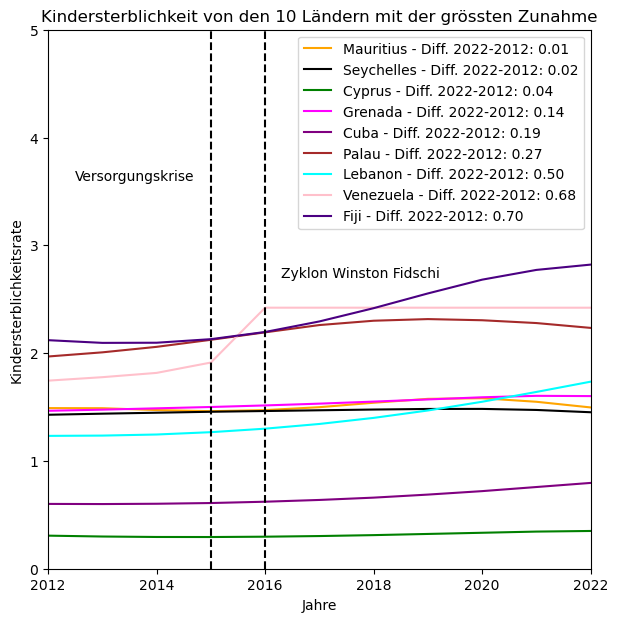

In [30]:
color_dict = {
    'Mauritius': 'orange',
    'Seychelles': 'black',
    'Cyprus': 'green',
    'Grenada': 'magenta',
    'Cuba': 'purple',
    'Palau': 'brown',
    'Lebanon': 'cyan',
    'Venezuela': 'pink',
    'Fiji': 'indigo'
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(
        title='Kindersterblichkeit von den 10 Ländern mit der grössten Zunahme', 
        xlabel='Jahre', 
        ylabel='Kindersterblichkeitsrate', 
        legend=True,
        label=f'{gebiet} - Diff. 2022-2012: {diff:.2f}',
        xlim=[2012, 2022], 
        ylim=[0,5],
        color=color_dict[gebiet],
        figsize=(7,7))
    

g.axvline(x=2016, color='black', linestyle='--')
g.text(2016.3, 2.7, 'Zyklon Winston Fidschi')

g.axvline(x=2015, color='black', linestyle='--')
g.text(2012.5, 3.6, 'Versorgungskrise')

